: Explore Gaussian naive bayes scikit-learn documentation and figure out the attributes where mean and variance of learned distributions are stored.

Apply Gaussian naive bayes (10 class classifier) on MNIST data after flattening the data from 28*28 to 784 dimentional data. Use the learned distributions to generate new data points to generate new samples given a class and visulize it as grey scale images

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_openml
import pandas as pd



In [6]:
data = pd.read_csv('mnist_train.csv')

In [7]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split
X = X.astype(np.float64) / 255.0
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [15]:
acc = gnb.score(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 56.01%


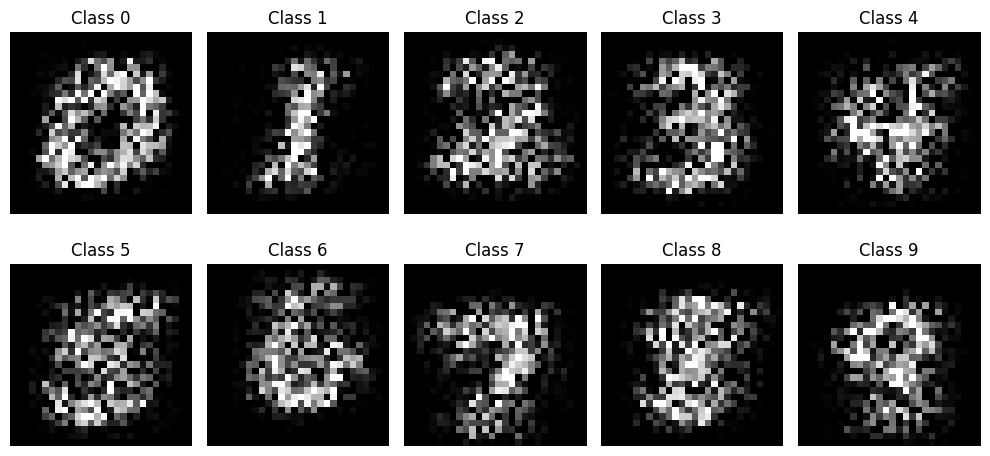

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for digit_class in range(10):
    mean = gnb.theta_[digit_class]
    var = gnb.var_[digit_class]

    sample = np.random.normal(mean, np.sqrt(var))
    sample = np.clip(sample, 0, 1)

    axes[digit_class].imshow(sample.reshape(28, 28), cmap='gray')
    axes[digit_class].set_title(f"Class {digit_class}")
    axes[digit_class].axis('off')

plt.tight_layout()
plt.show()